# Example for Lift Analysis

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from wingstructure import Wing, LiftAnalysis, LiftAndMomentAnalysis
import numpy as np

## Definition of wing

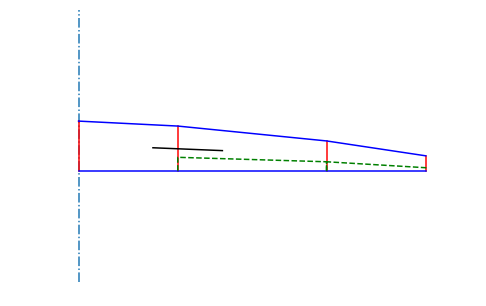

In [2]:
span_positions = [0, 2, 5, 7]
chord_lengths = [1, 0.9, 0.6, 0.3]
offsets = [0, 0.1, 0.4, 0.7]
twists = [0]*4
airfoils = [None]*4

twists2 = [0, 0, np.deg2rad(-1), np.deg2rad(-2)]

plt.figure(figsize=(8,5))

wing = Wing.create_from_planform(span_positions, chord_lengths, offsets, twists, airfoils);
wing.set_root_pos(0.0)
wing.set_airbrake(1.5,2.9)
wing.set_flap('flap', 2, 5,[0.3,0.3])
wing.set_flap('flap2', 5, 7, [0.3,0.2])

wing.plot()
plt.savefig('wing.png')

## Define analysis object and calculate distributions

/home/jonathan/Dokumente/Akaflieg/wingstructure/wingstructure/analysis.py:21: UserWarning: No airfoil database defined, using default airfoil.
  warn('No airfoil database defined, using default airfoil.')


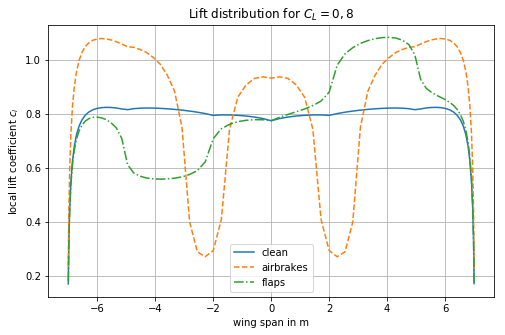

In [3]:
liftana = LiftAnalysis(wing)

span_pos = liftana.calculation_positions

α, distribution = liftana.calculate(c_l=0.8)
α_ab, distribution_ab = liftana.calculate(c_l=0.8, air_brake=True)
α_qr, distribution_q = liftana.calculate(c_l=0.8, 
            flap_deflections={'flap': [np.radians(5),np.radians(-5)]})

plt.figure(figsize=(8,5))
plt.plot(span_pos, distribution, label='clean')
plt.plot(span_pos, distribution_ab, '--', label='airbrakes')
plt.plot(span_pos, distribution_q, '-.', label='flaps')
plt.xlabel('wing span in m')
plt.ylabel('local lift coefficient $c_l$')
plt.title('Lift distribution for $C_L = 0,8$')
plt.grid()
plt.legend()
plt.savefig('Liftdistribution.png')

In [4]:
liftana.flaps_lift, liftana.thetas/np.pi

({'flap': 0.013189111775299592, 'flap2': 0.0047150208848441653},
 array([ 0.01315789,  0.02631579,  0.03947368,  0.05263158,  0.06578947,
         0.07894737,  0.09210526,  0.10526316,  0.11842105,  0.13157895,
         0.14473684,  0.15789474,  0.17105263,  0.18421053,  0.19736842,
         0.21052632,  0.22368421,  0.23684211,  0.25      ,  0.26315789,
         0.27631579,  0.28947368,  0.30263158,  0.31578947,  0.32894737,
         0.34210526,  0.35526316,  0.36842105,  0.38157895,  0.39473684,
         0.40789474,  0.42105263,  0.43421053,  0.44736842,  0.46052632,
         0.47368421,  0.48684211,  0.5       ,  0.51315789,  0.52631579,
         0.53947368,  0.55263158,  0.56578947,  0.57894737,  0.59210526,
         0.60526316,  0.61842105,  0.63157895,  0.64473684,  0.65789474,
         0.67105263,  0.68421053,  0.69736842,  0.71052632,  0.72368421,
         0.73684211,  0.75      ,  0.76315789,  0.77631579,  0.78947368,
         0.80263158,  0.81578947,  0.82894737,  0.84210526,

In [5]:
liftana.calculation_chord_lengths

array([ 0.30089695,  0.30358628,  0.30806339,  0.31432063,  0.32234731,
        0.33212972,  0.34365114,  0.3568919 ,  0.37182936,  0.38843801,
        0.40668947,  0.42655256,  0.44799335,  0.4709752 ,  0.49545885,
        0.52140247,  0.54876173,  0.57748989,  0.60502525,  0.6259029 ,
        0.64759053,  0.6700511 ,  0.69324623,  0.71713629,  0.74168047,
        0.76683682,  0.79256239,  0.8188132 ,  0.84554442,  0.87271037,
        0.90013232,  0.91408008,  0.92817463,  0.94239189,  0.95670758,
        0.97109723,  0.98553626,  1.        ,  0.98553626,  0.97109723,
        0.95670758,  0.94239189,  0.92817463,  0.91408008,  0.90013232,
        0.87271037,  0.84554442,  0.8188132 ,  0.79256239,  0.76683682,
        0.74168047,  0.71713629,  0.69324623,  0.6700511 ,  0.64759053,
        0.6259029 ,  0.60502525,  0.57748989,  0.54876173,  0.52140247,
        0.49545885,  0.4709752 ,  0.44799335,  0.42655256,  0.40668947,
        0.38843801,  0.37182936,  0.3568919 ,  0.34365114,  0.33